## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

\newpage

### Solution 

Import dataset:

In [235]:
import pandas as pd
from scipy.io.arff import loadarff
from scipy.io import arff

In [236]:
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [237]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:-2], columns=names)


In [238]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,6700,4.9,no,no,no,good,no,no,notckd,None
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,None
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None


In [239]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

(1)

The dataset includes medical records with a label indicating the presence or absence of chronic kidney disease (CKD). The objective of our classification problem is to develop a predictive model that accurately identifies whether a patient has CKD, based on a set of features present in the dataset. This classification model aims to assist in the early detection of chronic kidney disease.

(2)

In [240]:
for col in df.columns:
    if df[col].dtype == 'object' and any(df[col].str.contains(r'\d', na=False)):
        df[col] = pd.to_numeric(df[col], errors='coerce')
        

(3)

In [241]:
features = df.shape[1]
observations = df.shape[0]
print("\n numbers of features: ", features)
print("\n numbers of observations: ", observations)


 numbers of features:  26

 numbers of observations:  400


There are 25 features and 400 observations. 

In [242]:
types = df.dtypes
print(types)

age        float64
bp         float64
sg         float64
al         float64
su         float64
rbc         object
pc          object
pcc         object
ba          object
bgr        float64
bu         float64
sc         float64
sod        float64
pot        float64
hemo       float64
pcv        float64
wbcc       float64
rbcc       float64
htn         object
dm          object
cad         object
appet       object
pe          object
ane         object
class       object
no_name     object
dtype: object


There are 14 categorical variables with dtype of ‘object’: Specific Gravity, Albumin, Sugar, Red Blood Cells, Pus Cell, Pus Cell Clumps, Bacteria, Hypertension, Diabetes Mellitus, Coronary Artery Disease, Appetite, Pedal Edema, Anemia, Class.

There are 11 numerical variables with dtype of ‘float64’: Age, Blood Pressure, Blood Glucose Random, Blood Urea, Serum Creatinine, Sodium, Potassium, Hemoglobin, Packed Cell Volume, White Blood Cell Count, Red Blood Cell Count.

In [243]:
summary = df.describe()
print(summary)

              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.7411

(4)

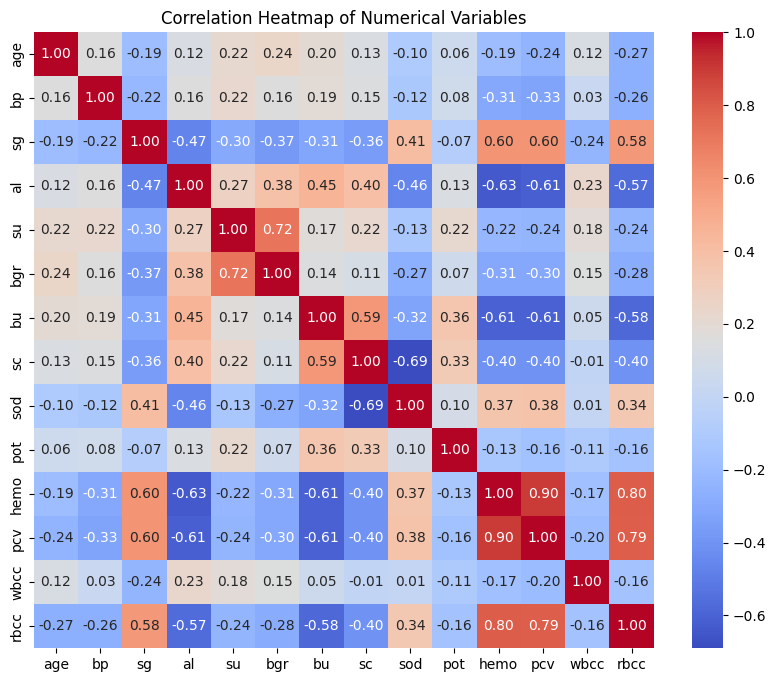

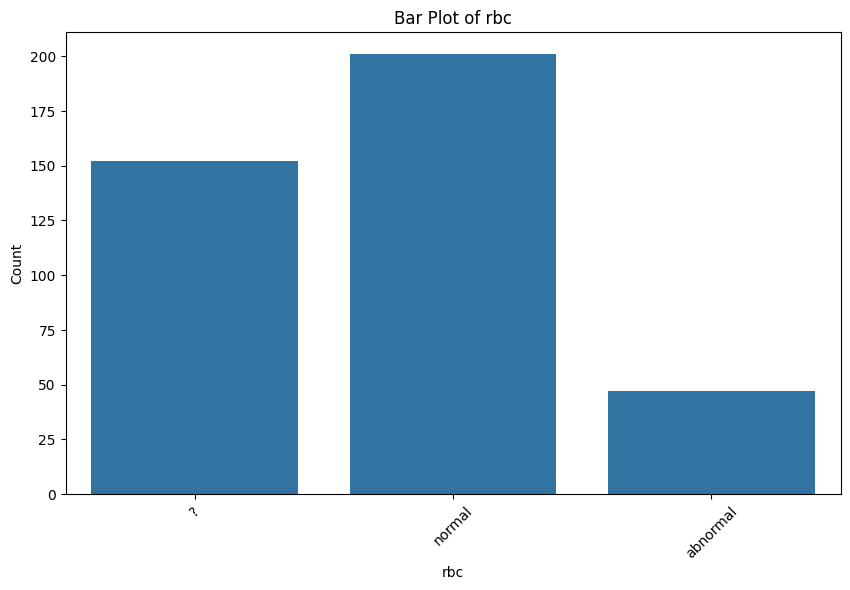

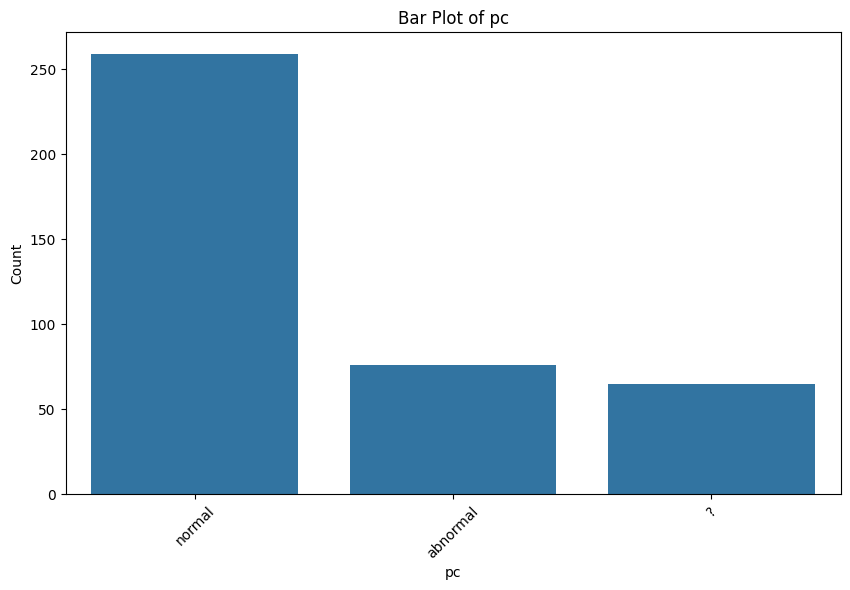

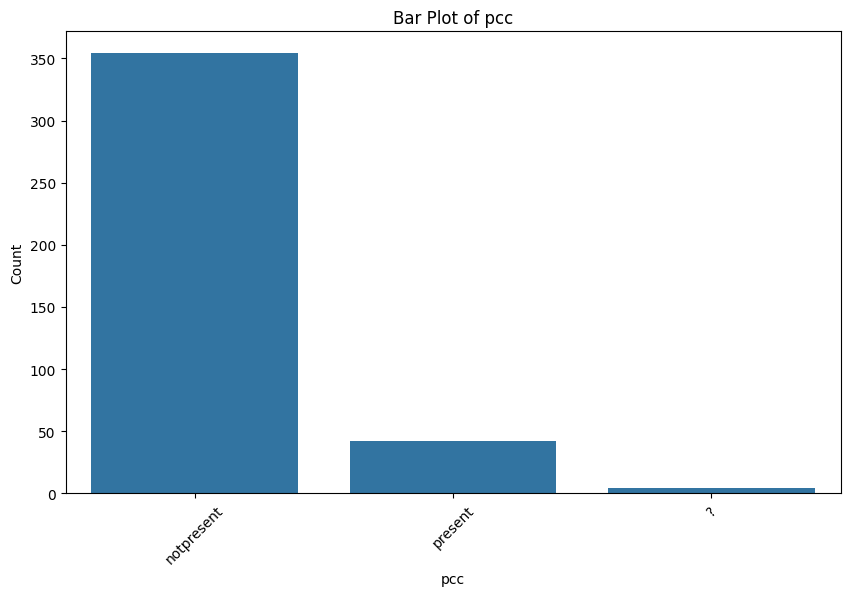

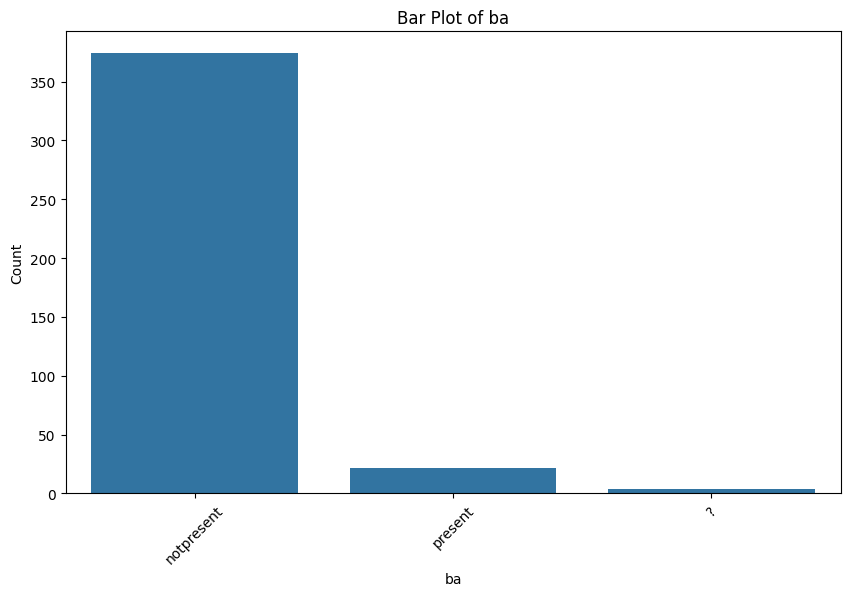

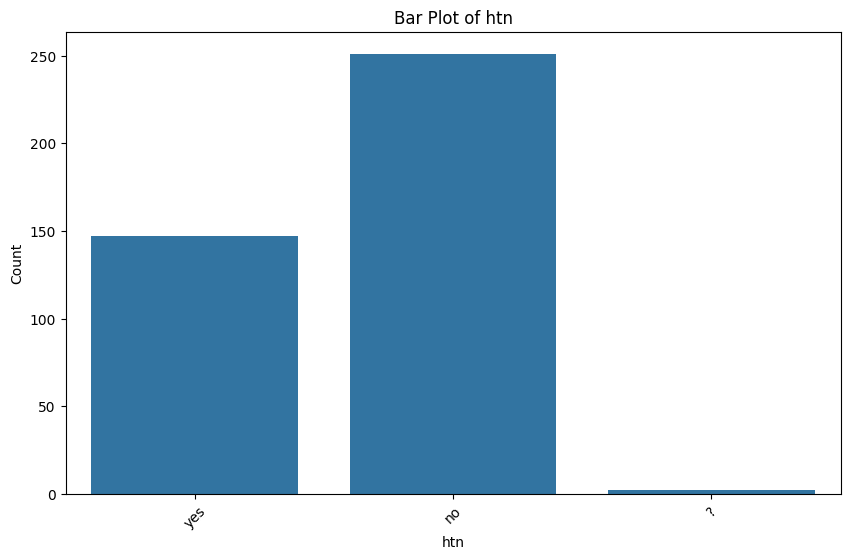

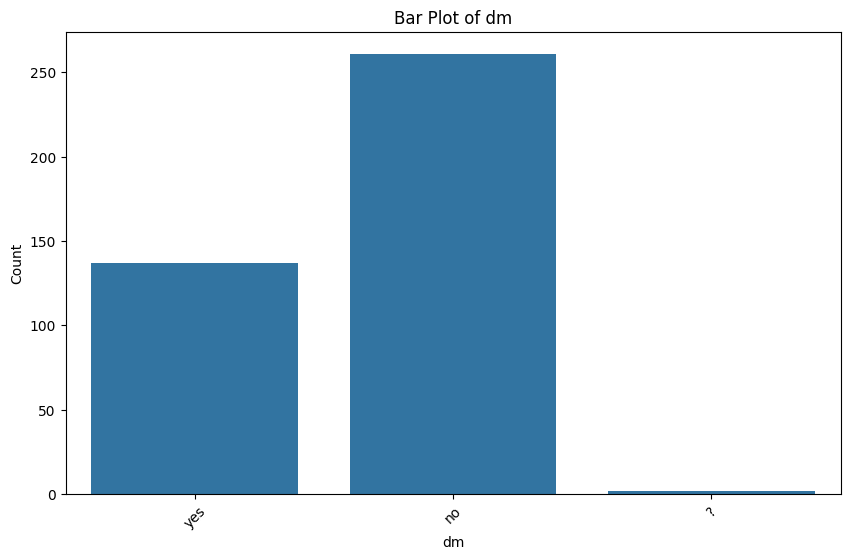

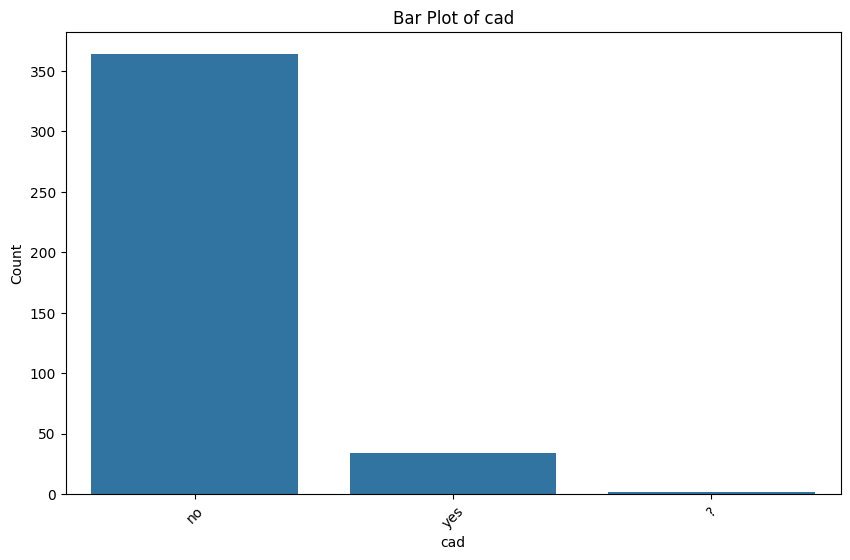

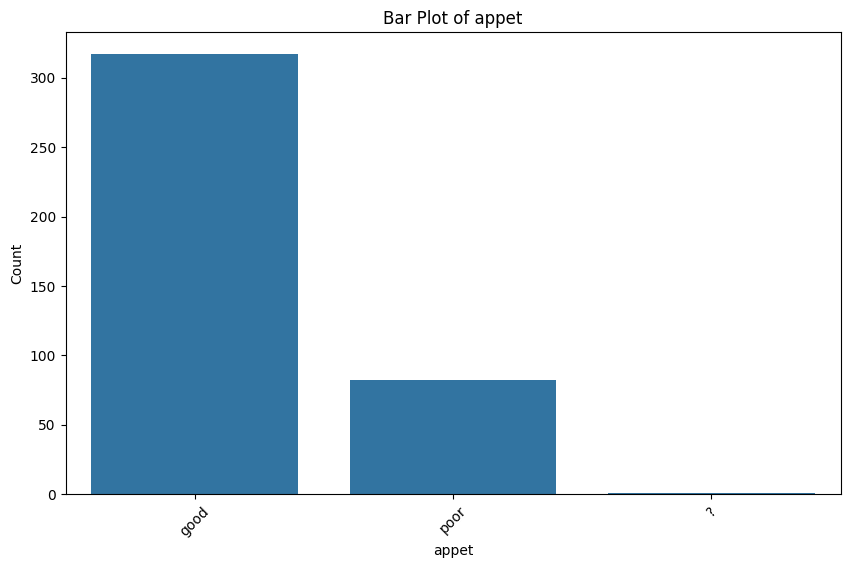

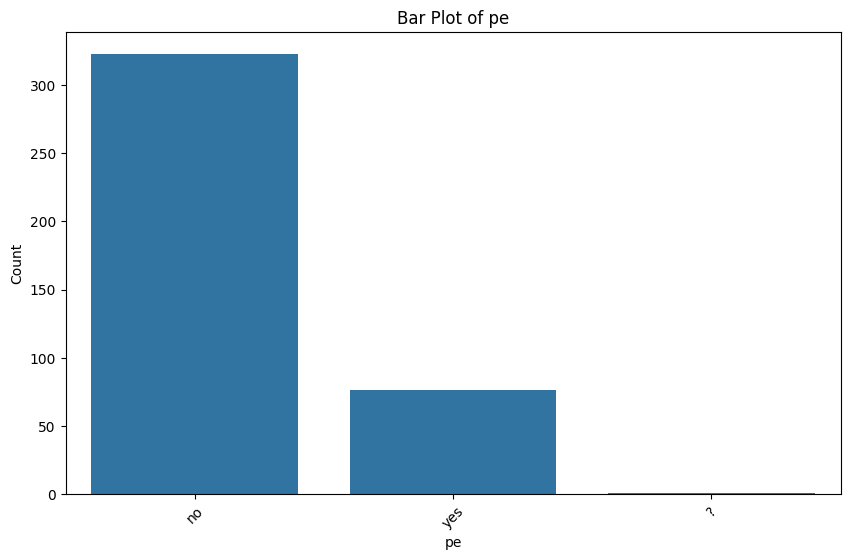

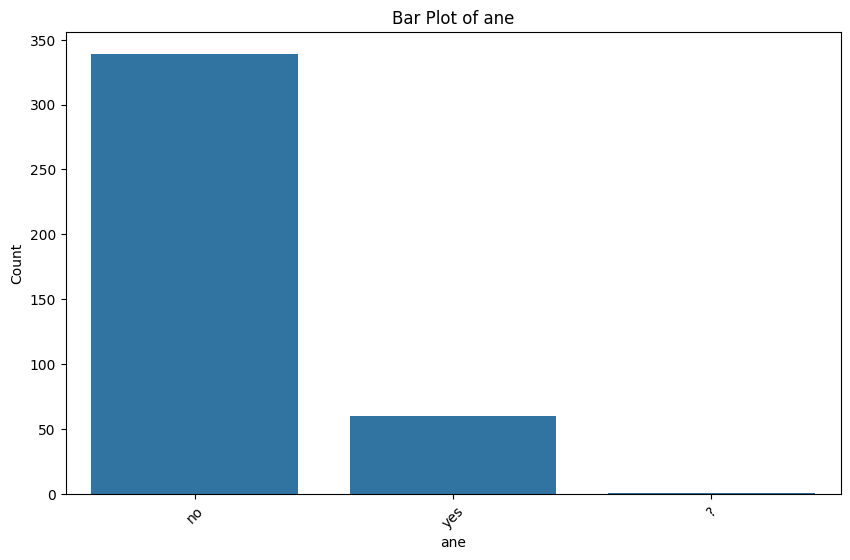

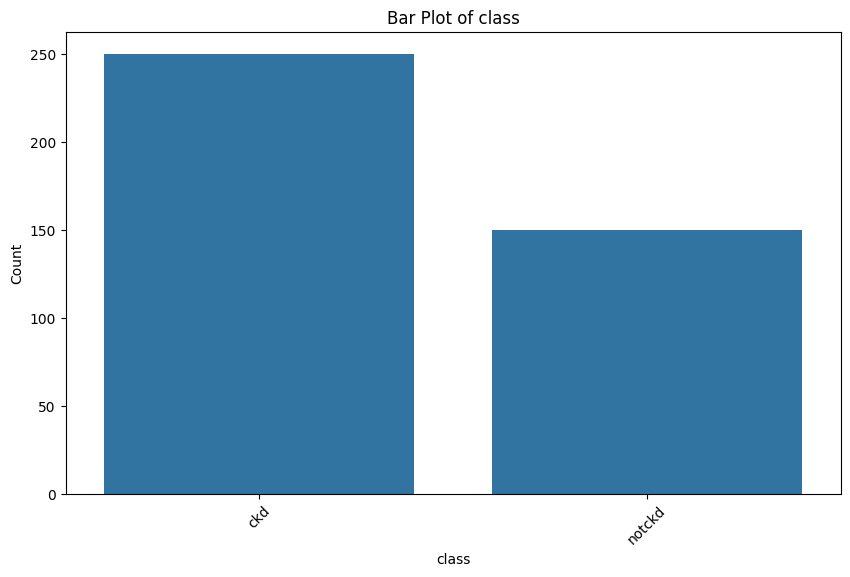

In [244]:
numerical_columns = df.select_dtypes(include=['float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

categorical_columns = df.select_dtypes(include=['object']).drop(columns=['no_name'])

for col in categorical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()

Commemts:  
(i) ``hemo (hemoglobin)`` has a highest positive correlation(0.90) with ``pcv (packed cell volume)``, meaning that when hemoglobin is high in the body, the packed cell volume is also high.      
(ii) ``sc (serum creatinine)`` has the highest negative correlation(-0.69) with ``sod (sodium)``, which means with high hemoglobin in the body, the packed cell volume is low.  
(iii) From Bar Plot, we see that there are almost 150 missing values in the variable ``rbc(Red Blood Cells)``, so we would like to drop this variable.

(5)

In [245]:
missing_values = df.isnull().sum()
missing_values

age          9
bp          12
sg          47
al          46
su          49
rbc          0
pc           0
pcc          0
ba           0
bgr         44
bu          19
sc          17
sod         87
pot         88
hemo        52
pcv         71
wbcc       106
rbcc       131
htn          0
dm           0
cad          0
appet        0
pe           0
ane          0
class        0
no_name    398
dtype: int64

In [246]:
total_missing_value = df.isnull().sum().sum()
total_missing_value


1176

In [247]:
drop_numerical_columns = missing_values[missing_values > 40].index
df.drop(columns = drop_numerical_columns, inplace = True)
df.drop(columns=['rbc', 'pc'], inplace = True)
df


,age,bp,pcc,ba,bu,sc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,notpresent,notpresent,36.0,1.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,notpresent,notpresent,18.0,0.8,no,no,no,good,no,no,ckd
2,62.0,80.0,notpresent,notpresent,53.0,1.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,present,notpresent,56.0,3.8,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,notpresent,notpresent,26.0,1.4,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,notpresent,notpresent,49.0,0.5,no,no,no,good,no,no,notckd
396,42.0,70.0,notpresent,notpresent,31.0,1.2,no,no,no,good,no,no,notckd
397,12.0,80.0,notpresent,notpresent,26.0,0.6,no,no,no,good,no,no,notckd
398,17.0,60.0,notpresent,notpresent,50.0,1.0,no,no,no,good,no,no,notckd


In [248]:
missing_values = df.isnull().sum()
missing_values


age       9
bp       12
pcc       0
ba        0
bu       19
sc       17
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

In [249]:
df = df.dropna()

In [250]:
missing_values = df.isnull().sum()
missing_values


age      0
bp       0
pcc      0
ba       0
bu       0
sc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

(6)

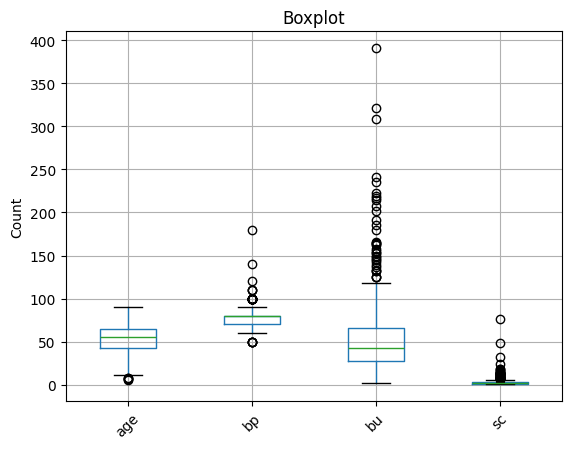

In [251]:
df.boxplot()

plt.xticks(rotation=45)
plt.title('Boxplot')
plt.ylabel('Count')

plt.show()

In [252]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['int', 'float']).columns


scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])



C:\Users\Rick\AppData\Local\Temp\ipykernel_26780\1408148198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


(7)

(8)

In [253]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.30, 
    random_state=1, 
    stratify=y
    )

NameError: name 'x' is not defined

(9)

(10)

(11)

(12)

(13)

(14)

(15)

(16)

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
